In [14]:
from typing import Literal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import catppuccin


In [15]:
palette_main = list(catppuccin.PALETTE.latte.colors)[:14]
palette_light = list(catppuccin.PALETTE.mocha.colors)[:14]

In [16]:
SORT: Literal['name', 'credit', 'score', 'earned', 'loss'] = 'earned'
SHOW: Literal['credit', 'score'] = 'score'

In [17]:
df = pd.read_csv('data.tsv', sep='\t')
df['earned'] = df['score'] / 100 * df['credit']
df['loss'] = df['credit'] - df['earned']
df = df.sort_values(by=SORT, ascending=False).reset_index(drop=True)

total = np.sum(df['credit'])
mean = np.sum(df['earned']) / total
title = f'Mean: {mean*100:.2f} | Sorted by {SORT} | Showing {SHOW}'

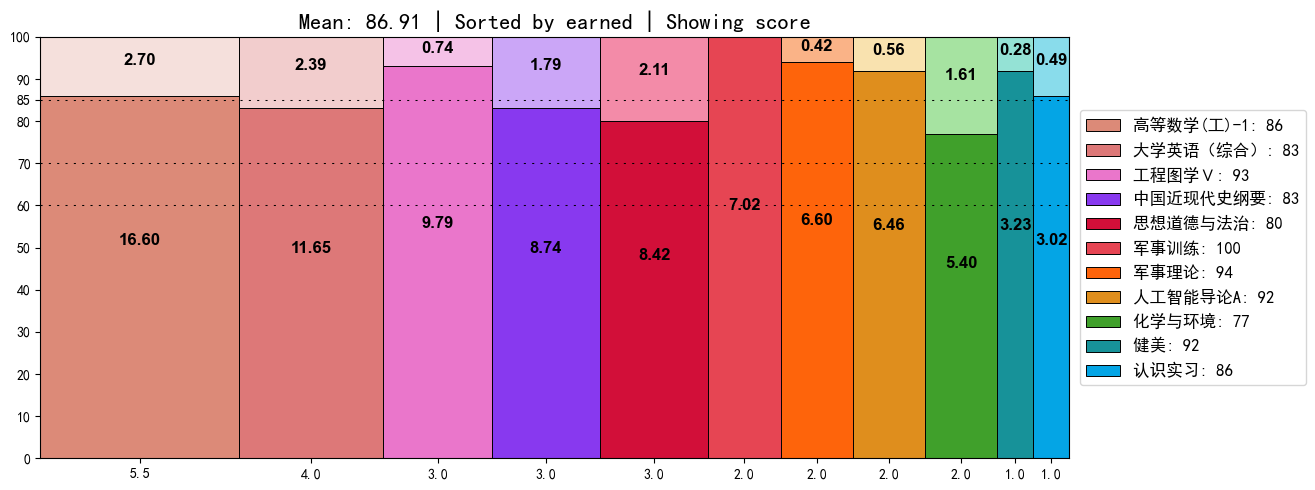

In [18]:

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(16, 5))

bar_handles = []
legend_labels = []

left = 0

for row in df.itertuples(index=True):
    i:      int   = row.Index                # type: ignore
    name:   str   = row.name                 # type: ignore
    credit: float = row.credit               # type: ignore
    score:  float = row.score                # type: ignore
    earned: float = row.earned               # type: ignore
    loss:   float = row.loss                 # type: ignore

    main_color_rgb = palette_main[i % len(palette_main)].rgb
    main_color = (main_color_rgb.r/255, main_color_rgb.g/255, main_color_rgb.b/255)
    light_color = palette_light[i % len(palette_light)].rgb
    light_color = (light_color.r/255, light_color.g/255, light_color.b/255)

    handle = ax.bar(left, score, width=credit, color=main_color, edgecolor='black', linewidth=0.7, align='edge')
    ax.bar(left, 100 - score, width=credit, bottom=score, color=light_color, edgecolor='black', linewidth=0.7, align='edge')

    bar_handles.append(handle[0])
    legend_labels.append(f"{name}: {score}")

    x = left + credit / 2
    y = score * 0.6

    if SHOW == 'credit':
        maintext = f"{earned:.2f}"
        subtext = f"{loss:.2f}"
    elif SHOW == 'score':
        maintext = f"{earned*100/total:.2f}"
        subtext = f"{loss*100/total:.2f}"

    ax.text(x, y, maintext, ha='center', va='center',
            fontsize=12, fontweight='bold', color='black', fontname='Arial')

    if score < 100:
        y2 = score + (100 - score) * 0.6
        ax.text(x, y2, subtext, ha='center', va='center',
                fontsize=12, fontweight='bold', color='black', fontname='Arial')

    left += credit

midpoints = np.cumsum([0] + df['credit'].to_list())[:-1] + np.array(df['credit']) / 2
ax.set_xticks(midpoints)
ax.set_xticklabels([f"{credit:.1f}" for credit in df['credit']])
yticks = set(range(0, 101, 10))
yticks |= {85, 70, 60}
yticks = sorted(yticks)
ax.set_yticks(yticks)

for y_val in [85, 70, 60]:
    ax.axhline(y=y_val, color='black', linestyle=(0, (2, 6)), linewidth=0.75)

ax.margins(x=0)

ax.set_title(title, fontsize=16, fontweight='bold', loc='center')

ax.legend(bar_handles, legend_labels, fontsize=12, title_fontsize=13,
          loc="center left", bbox_to_anchor=(1.01, 0.5), borderaxespad=0)

plt.tight_layout(rect=(0, 0, 0.83, 1))
plt.savefig('result.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
df

,name,credit,score,earned,loss
0,高等数学(工)-1,5.5,86,4.73,0.77
1,大学英语（综合）,4.0,83,3.32,0.68
2,工程图学Ⅴ,3.0,93,2.79,0.21
3,中国近现代史纲要,3.0,83,2.49,0.51
4,思想道德与法治,3.0,80,2.40,0.60
5,军事训练,2.0,100,2.00,0.00
6,军事理论,2.0,94,1.88,0.12
7,人工智能导论A,2.0,92,1.84,0.16
8,化学与环境,2.0,77,1.54,0.46
9,健美,1.0,92,0.92,0.08
